<h1 align="center">Electric Vehicles Sales Analysis for the Indian Market</h1>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
df_date=pd.read_csv("dataset/dim_date.csv")
df_makers=pd.read_csv("dataset/electric_vehicle_sales_by_makers.csv")
df_state=pd.read_csv("dataset/electric_vehicle_sales_by_state.csv")

In [3]:
# Check for data types of df_date
df_date.dtypes

date           object
fiscal_year     int64
quarter        object
dtype: object

In [4]:
# Converting Date from object data type to date data type
df_date["date"]=pd.to_datetime(df_date["date"])

In [5]:
# Rechecking data types 
df_date.dtypes

date           datetime64[ns]
fiscal_year             int64
quarter                object
dtype: object

In [6]:
# Check for null values
df_date.isnull().sum()

date           0
fiscal_year    0
quarter        0
dtype: int64

In [7]:
# Check for data types of df_makers
df_makers.dtypes

date                      object
vehicle_category          object
maker                     object
electric_vehicles_sold     int64
dtype: object

In [8]:
# Converting Date from object data type to date data type
df_makers["date"]=pd.to_datetime(df_makers["date"])

In [9]:
# Rechecking data types 
df_makers.dtypes

date                      datetime64[ns]
vehicle_category                  object
maker                             object
electric_vehicles_sold             int64
dtype: object

In [10]:
# Check for null values
df_makers.isnull().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

In [11]:
# Check for data types of df_date
df_state.dtypes

date                      object
state                     object
vehicle_category          object
electric_vehicles_sold     int64
total_vehicles_sold        int64
dtype: object

In [12]:
# Converting Date from object data type to date data type
df_state["date"]=pd.to_datetime(df_state["date"])

In [13]:
# Rechecking data types 
df_state.dtypes

date                      datetime64[ns]
state                             object
vehicle_category                  object
electric_vehicles_sold             int64
total_vehicles_sold                int64
dtype: object

In [14]:
# Check for null values
df_state.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [15]:
df_state.shape

(2445, 5)

In [16]:
# Check if electric vehicles sold are not greater than total vehicles sold because it is outlier in the dataset ,it may cause our results to be skewed
df_state=df_state[~(df_state["electric_vehicles_sold"]>df_state["total_vehicles_sold"])]

In [17]:
df_state.shape

(2444, 5)

In [18]:
# Check for uniqueness of States
df_state["state"].unique()

array(['Sikkim', 'Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam',
       'Chhattisgarh', 'DNH and DD', 'Jammu and Kashmir', 'Ladakh',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Puducherry',
       'Tripura', 'Bihar', 'Chandigarh', 'Delhi', 'Madhya Pradesh',
       'Odisha', 'Punjab', 'Uttarakhand', 'Himachal Pradesh',
       'Andaman & Nicobar', 'Haryana', 'Jharkhand', 'Andhra Pradesh',
       'Goa', 'Gujarat', 'Karnataka', 'Kerala', 'Maharashtra',
       'Rajasthan', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [19]:
# Total 35 States with Andaman & Nicobar is displayed twice , we need to handle it
len(df_state["state"].unique()) 

35

In [20]:
# Replace Andaman & Nicobar with Andaman & Nicobar Island
df_state["state"]=df_state["state"].replace("Andaman & Nicobar","Andaman & Nicobar Island")
df_state["state"].unique()
len(df_state["state"].unique())

34

In [21]:
# Setting default style for all graphs
plt.style.use("fivethirtyeight")

# Preliminary Research Questions

# 1. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold. 

In [22]:
# Top 3 Makers in Fiscal Year 2023 by Number of 2 Wheelers Sold
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2023)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).head(3)
df

,maker,electric_vehicles_sold
8,OLA ELECTRIC,152583
7,OKINAWA,96945
4,HERO ELECTRIC,88993


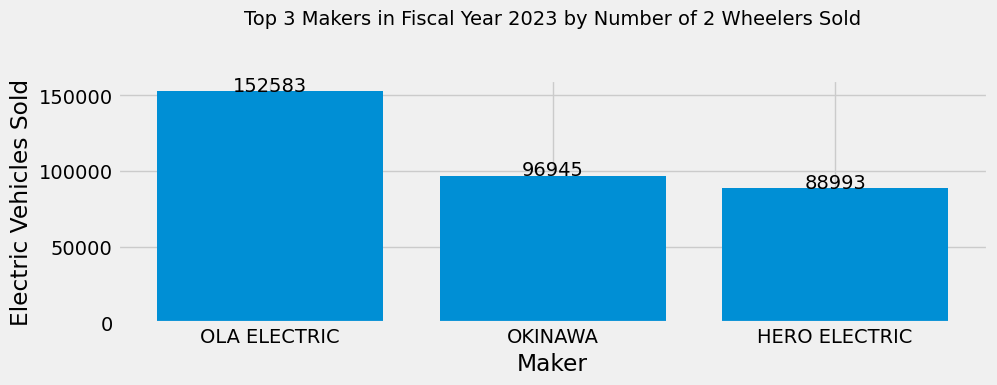

In [23]:
# Plot the graph
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,3))
plt.bar(df["maker"],df["electric_vehicles_sold"],align="center")
for i,value in enumerate(df["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Top 3 Makers in Fiscal Year 2023 by Number of 2 Wheelers Sold", fontsize=14, loc="center",pad=40)
plt.xlabel("Maker")
plt.ylabel("Electric Vehicles Sold")
plt.show()

In [24]:
# Bottom 3 Makers in Fiscal Year 2023 by Number of 2 Wheelers Sold
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2023)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).tail(3)
df

,maker,electric_vehicles_sold
10,PURE EV,11556
3,BEING,11018
5,JITENDRA,8563


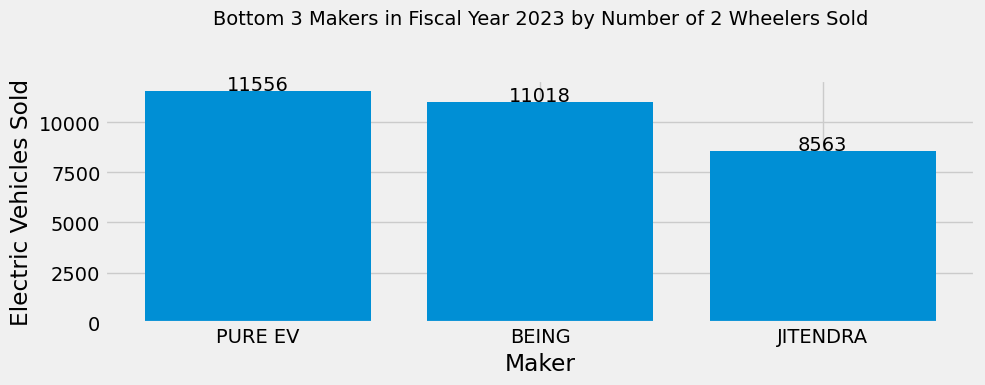

In [25]:
# Plot the graph
plt.figure(figsize=(10,3))
plt.bar(df["maker"],df["electric_vehicles_sold"],align="center")
for i,value in enumerate(df["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Bottom 3 Makers in Fiscal Year 2023 by Number of 2 Wheelers Sold", fontsize=14, loc="center",pad=40)
plt.xlabel("Maker")
plt.ylabel("Electric Vehicles Sold")
plt.show()

In [26]:
# Top 3 Makers in Fiscal Year 2024 by Number of 2 Wheelers Sold
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).head(3)
df

,maker,electric_vehicles_sold
9,OLA ELECTRIC,322489
12,TVS,180743
1,ATHER,107552


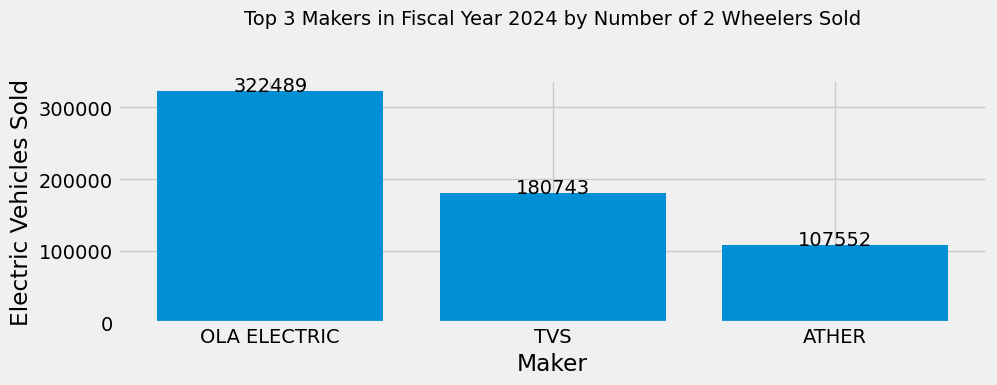

In [27]:
# Plot the graph
plt.figure(figsize=(10,3))
plt.bar(df["maker"],df["electric_vehicles_sold"],align="center")
for i,value in enumerate(df["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Top 3 Makers in Fiscal Year 2024 by Number of 2 Wheelers Sold", fontsize=14, loc="center",pad=40)
plt.xlabel("Maker")
plt.ylabel("Electric Vehicles Sold")
plt.show()

In [28]:
# Bottom 3 Makers in Fiscal Year 2024 by Number of 2 Wheelers Sold
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="2-Wheelers")]
df=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).tail(3)
df

,maker,electric_vehicles_sold
6,KINETIC GREEN,9585
11,REVOLT,7254
3,BATTRE ELECTRIC,4841


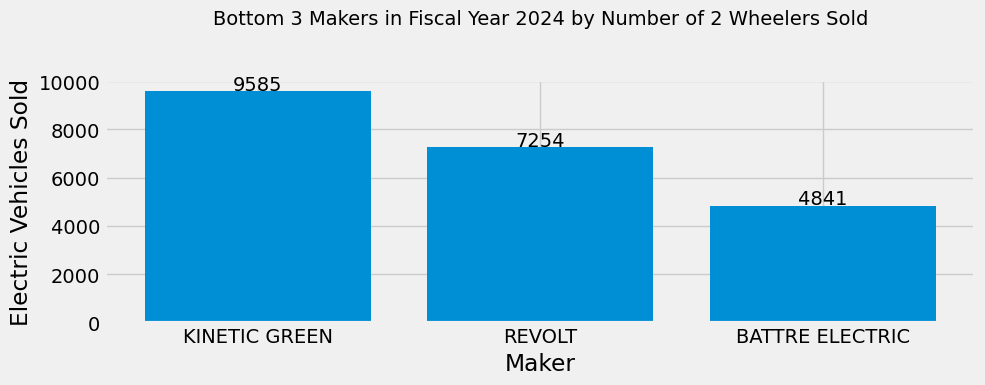

In [29]:
# Plot the graph
plt.figure(figsize=(10,3))
plt.bar(df["maker"],df["electric_vehicles_sold"],align="center")
for i,value in enumerate(df["electric_vehicles_sold"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Bottom 3 Makers in Fiscal Year 2024 by Number of 2 Wheelers Sold", fontsize=14, loc="center",pad=40)
plt.xlabel("Maker")
plt.ylabel("Electric Vehicles Sold")
plt.show()

# 2. Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024. 

In [30]:
# Top 5 States with highest penetration rate of 2 Wheelers for Fiscal Year 2024
df=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="2-Wheelers")]
df["penetration_rate_pct"]=(df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100
df=df.groupby(["state"],as_index=False)["penetration_rate_pct"].mean().sort_values(by="penetration_rate_pct",ascending=False).head(5).round(2)
df

,state,penetration_rate_pct
9,Goa,18.18
16,Kerala,13.61
15,Karnataka,11.51
19,Maharashtra,10.16
8,Delhi,9.70


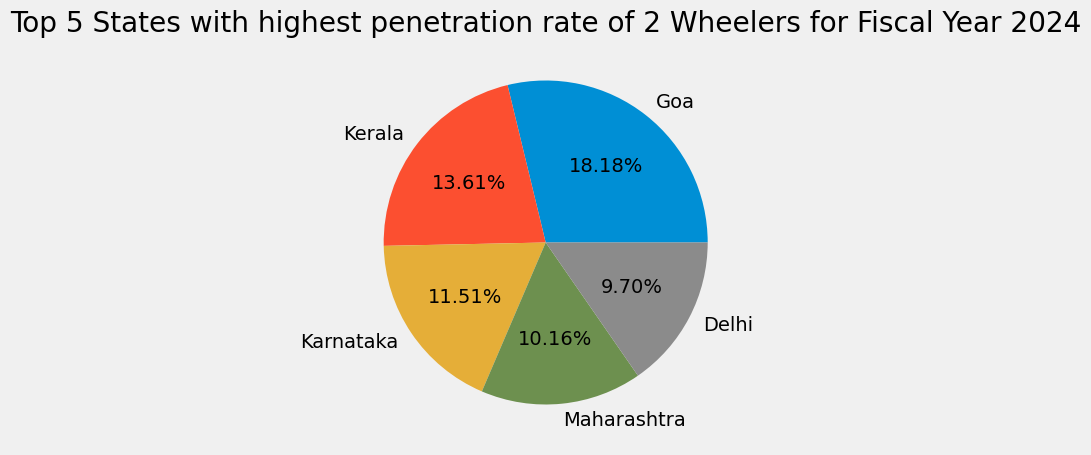

In [31]:
# Plot the graph
total =df["penetration_rate_pct"].sum()
plt.figure(figsize=(10,5))
plt.pie(df["penetration_rate_pct"], labels=df["state"], autopct=lambda x: "{:.2f}%".format(x*total/100), startangle=0)
plt.title("Top 5 States with highest penetration rate of 2 Wheelers for Fiscal Year 2024")
plt.show()

In [32]:
# Top 5 States with highest penetration rate of 4 Wheelers for Fiscal Year 2024
df=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="4-Wheelers")]
df["penetration_rate_pct"]=(df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100
df=df.groupby(["state"],as_index=False)["penetration_rate_pct"].mean().sort_values(by="penetration_rate_pct",ascending=False).head(5).round(2)
df

,state,penetration_rate_pct
16,Kerala,5.47
5,Chandigarh,4.91
9,Goa,4.37
15,Karnataka,4.28
8,Delhi,4.26


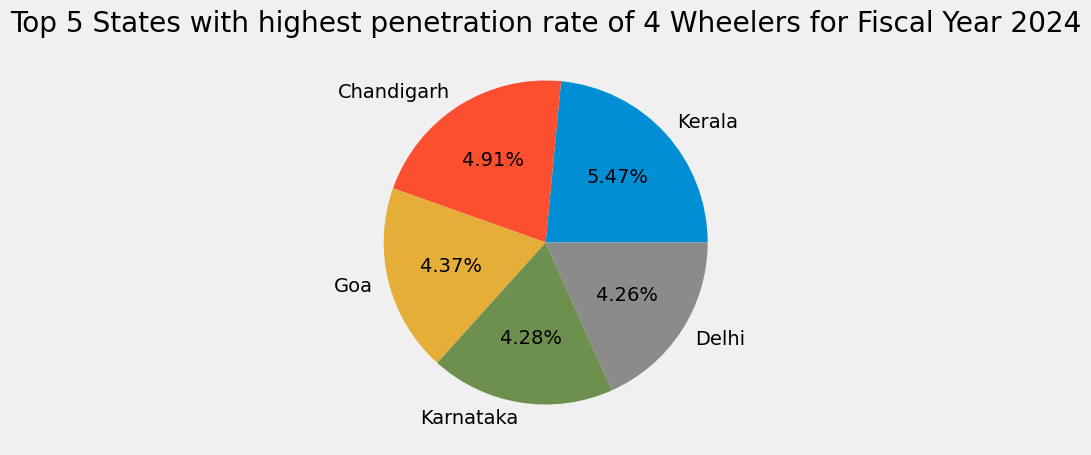

In [33]:
# Plot the graph
total =df["penetration_rate_pct"].sum()
plt.figure(figsize=(10,5))
plt.pie(df["penetration_rate_pct"], labels=df["state"], autopct=lambda x: "{:.2f}%".format(x*total/100), startangle=0)
plt.title("Top 5 States with highest penetration rate of 4 Wheelers for Fiscal Year 2024")
plt.show()

# 3. List the states with negative penetration (decline) in EV sales from 2022 to 2024? 

In [34]:
# Penetration rate for States in fiscal year 2022 
df=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df=df[df["fiscal_year"]==2022]
df["penetration_rate_2022_pct"]=round((df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100,2)
df_2022=df.groupby(["state"],as_index=False)["penetration_rate_2022_pct"].mean().round(2)
df_2022

,state,penetration_rate_2022_pct
0,Andaman & Nicobar Island,0.65
1,Andhra Pradesh,1.28
2,Arunachal Pradesh,0.00
3,Assam,0.12
4,Bihar,0.36
5,Chandigarh,1.06
6,Chhattisgarh,0.72
7,DNH and DD,0.23
8,Delhi,3.16
9,Goa,3.22


In [35]:
# Penetration rate for States in fiscal year 2023 
df=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df=df[df["fiscal_year"]==2023]
df["penetration_rate_2023_pct"]=round((df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100,2)
df_2023=df.groupby(["state"],as_index=False)["penetration_rate_2023_pct"].mean().round(2)
df_2023

,state,penetration_rate_2023_pct
0,Andaman & Nicobar Island,0.31
1,Andhra Pradesh,2.90
2,Arunachal Pradesh,0.01
3,Assam,0.33
4,Bihar,0.75
5,Chandigarh,6.13
6,Chhattisgarh,3.12
7,DNH and DD,0.72
8,Delhi,6.76
9,Goa,8.02


In [36]:
# Penetration rate for States in fiscal year 2024 
df=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df=df[df["fiscal_year"]==2024]
df["penetration_rate_2024_pct"]=round((df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100,2)
df_2024=df.groupby(["state"],as_index=False)["penetration_rate_2024_pct"].mean().round(2)
df_2024

,state,penetration_rate_2024_pct
0,Andaman & Nicobar Island,0.56
1,Andhra Pradesh,3.28
2,Arunachal Pradesh,0.11
3,Assam,0.52
4,Bihar,1.16
5,Chandigarh,6.72
6,Chhattisgarh,4.33
7,DNH and DD,1.12
8,Delhi,6.98
9,Goa,11.28


In [37]:
# Comparing Penetration rate change for States in all fiscal years from 2022 ro 2024
df=pd.merge(df_2022,df_2023,on="state",how="inner")
df=df.merge(df_2024,on="state",how="inner")
df["change_22_23"]=df["penetration_rate_2023_pct"]-df["penetration_rate_2022_pct"]
df["change_23_24"]=df["penetration_rate_2024_pct"]-df["penetration_rate_2023_pct"]
df=df[df["change_22_23"]<0]
df

,state,penetration_rate_2022_pct,penetration_rate_2023_pct,penetration_rate_2024_pct,change_22_23,change_23_24
0,Andaman & Nicobar Island,0.65,0.31,0.56,-0.34,0.25
17,Ladakh,2.64,0.46,2.01,-2.18,1.55


#### Andaman & Nicobar Island and Ladakh are the 2 states with decline in penetration rate over years.

# 4. What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

In [38]:
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[df["vehicle_category"]=="4-Wheelers"]

# Find top 5 makers as per electric vehicles sold 
top5_makers=df.groupby(["maker"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False).head(5)

# Group maker and quarters as per electric vehicles sold 
df_groupped=df.groupby(["maker","quarter"],as_index=False)["electric_vehicles_sold"].sum()
df_groupped=df_groupped.sort_values(by=["electric_vehicles_sold","quarter"],ascending=[False,True])

# Merge above dataframes to get required top 5 makers electric vehicles sales as per quarters
df=pd.merge(left=top5_makers,right=df_groupped,on="maker",how="inner",suffixes=("top_5_makers","_quarterly_sales"))
df

,maker,electric_vehicles_soldtop_5_makers,quarter,electric_vehicles_sold_quarterly_sales
0,Tata Motors,88935,Q4,32723
1,Tata Motors,88935,Q3,23678
2,Tata Motors,88935,Q2,18581
3,Tata Motors,88935,Q1,13953
4,Mahindra & Mahindra,41193,Q1,13286
5,Mahindra & Mahindra,41193,Q2,9670
6,Mahindra & Mahindra,41193,Q4,9212
7,Mahindra & Mahindra,41193,Q3,9025
8,MG Motor,13753,Q2,3957
9,MG Motor,13753,Q3,3766


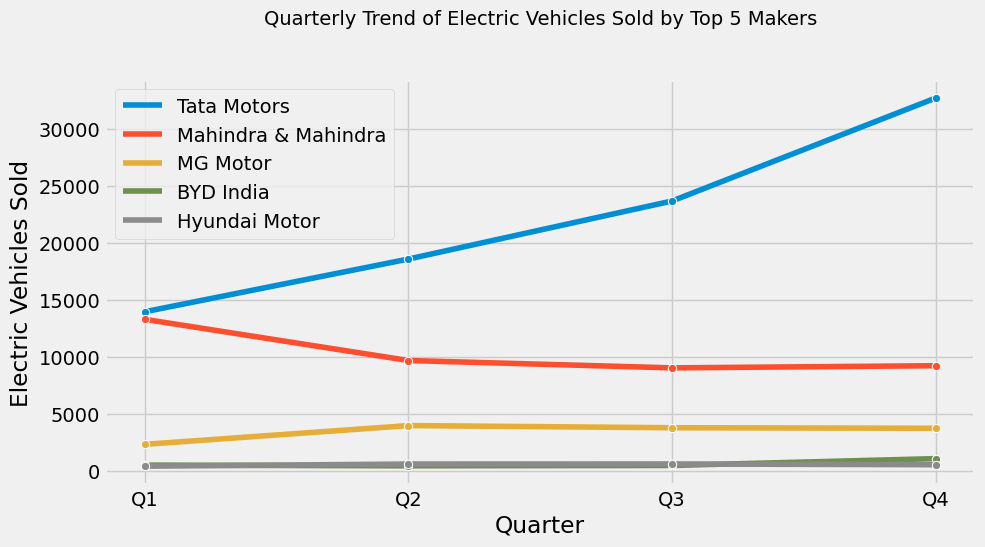

In [39]:
# Plot the graph
quarter_order=["Q1","Q2","Q3","Q4"]
plt.figure(figsize=(10,5))
df['quarter'] = pd.Categorical(df['quarter'], categories=quarter_order, ordered=True)
sns.lineplot(data=df, x="quarter", y="electric_vehicles_sold_quarterly_sales", hue="maker", marker='o')
plt.title("Quarterly Trend of Electric Vehicles Sold by Top 5 Makers",fontsize=14,loc="center",pad=40)
plt.xlabel("Quarter")
plt.legend(loc="best")
plt.ylabel("Electric Vehicles Sold")
plt.show()

# 5. How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

In [40]:
# Comparision of Electric Vehicles Sales & Penetration Rate for Delhi & Karnataka
df=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df["penetration_rate"]=(df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100
df=df[df["fiscal_year"]==2024]
df=df.groupby(["state"],as_index=False).agg({"electric_vehicles_sold":"sum","penetration_rate":"mean"})
df["penetration_rate"]=df["penetration_rate"].round(2)
df=df[(df["state"]=="Delhi")|(df["state"]=="Karnataka")].sort_values(by="penetration_rate",ascending=False)
df

,state,electric_vehicles_sold,penetration_rate
15,Karnataka,160989,7.89
8,Delhi,46724,6.98


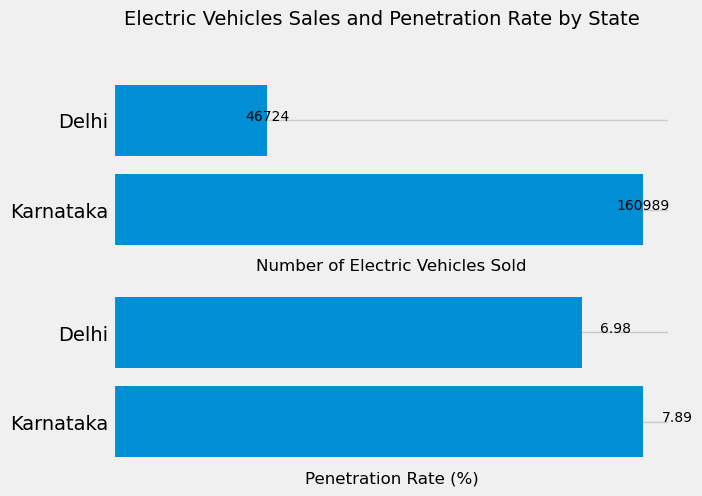

In [41]:
# Plot the graph
plt.suptitle("Electric Vehicles Sales and Penetration Rate by State", fontsize=14, y=1.02)

plt.subplot(2, 1, 1)
plt.barh(df["state"], df["electric_vehicles_sold"], align="center")
for i, value in enumerate(df["electric_vehicles_sold"]):
    plt.text(value + 5, i, str(value), ha='center', fontsize=10)
plt.xticks([]) 
plt.xlabel("Number of Electric Vehicles Sold",fontsize=12)

plt.subplot(2, 1, 2)
plt.barh(df["state"], df["penetration_rate"], align="center")
for i, value in enumerate(df["penetration_rate"]):
    plt.text(value + 0.5, i, str(value), ha='center', fontsize=10)  
plt.xticks([]) 
plt.xlabel("Penetration Rate (%)",fontsize=12)
plt.show()

# 6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

In [42]:
# Find number of 4 Wheelers sold in fiscal year 2024 by makers
df_2024=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df_2024=df_2024[(df_2024["vehicle_category"]=="4-Wheelers")&(df_2024["fiscal_year"]==2024)]
df_2024 =df_2024.groupby(["maker"], as_index=False)["electric_vehicles_sold"].sum().rename(columns={"electric_vehicles_sold": "electric_vehicles_sold_2024"})
df_2024

,maker,electric_vehicles_sold_2024
0,BMW India,1078
1,BYD India,1466
2,Hyundai Motor,1390
3,KIA Motors,328
4,MG Motor,8829
5,Mahindra & Mahindra,23346
6,Mercedes -Benz AG,291
7,PCA Automobiles,1533
8,Tata Motors,48181
9,Volvo Auto India,459


In [43]:
# Find number of 4 Wheelers sold in fiscal year 2022
df_2022=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df_2022=df_2022[(df_2022["vehicle_category"]=="4-Wheelers")&(df_2022["fiscal_year"]==2022)]
df_2022 = df_2022.groupby(["maker"], as_index=False)["electric_vehicles_sold"].sum().rename(columns={"electric_vehicles_sold": "electric_vehicles_sold_2022"})
df_2022

,maker,electric_vehicles_sold_2022
0,BMW India,7
1,BYD India,33
2,Hyundai Motor,110
3,KIA Motors,0
4,MG Motor,1647
5,Mahindra & Mahindra,4042
6,Mercedes -Benz AG,26
7,PCA Automobiles,0
8,Tata Motors,12708
9,Volvo Auto India,4


In [44]:
# Find CAGR (Compund Annual Growth Rate) from above 2 dataframes by top 5 makers
df=pd.merge(left=df_2022,right=df_2024,on="maker",how="inner")
df["CAGR"]=round((((df["electric_vehicles_sold_2024"]/df["electric_vehicles_sold_2022"])**(1/2))-1)*100,2)
df["CAGR"]=np.where(df["electric_vehicles_sold_2022"]==0,0,df["CAGR"])
df=df[df["CAGR"]>0][["maker","CAGR"]]
df=df.sort_values(by="CAGR",ascending=False).head(5)
df

,maker,CAGR
0,BMW India,1140.97
9,Volvo Auto India,971.21
1,BYD India,566.52
2,Hyundai Motor,255.48
6,Mercedes -Benz AG,234.55


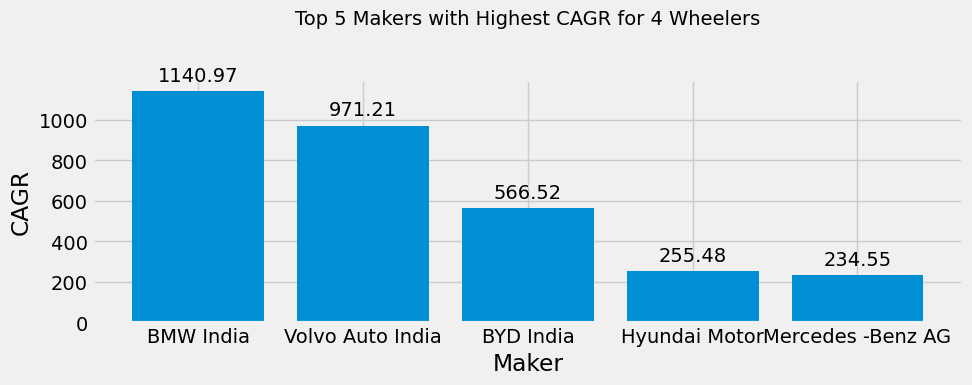

In [45]:
# Plot the graph
plt.figure(figsize=(10,3))
plt.bar(df["maker"],df["CAGR"],align="center")
for i,value in enumerate(df["CAGR"]):
    plt.text(i, value + 50, str(value), ha='center', fontsize=14)
plt.title("Top 5 Makers with Highest CAGR for 4 Wheelers", fontsize=14, loc="center",pad=40)
plt.xlabel("Maker")
plt.ylabel("CAGR")
plt.show()

# 7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold. 

In [46]:
# Find number total vehicles sold in fiscal year 2024 by states
df_2024=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df_2024=df_2024[df_2024["fiscal_year"]==2024]
df_2024 =df_2024.groupby(["state"], as_index=False)["total_vehicles_sold"].sum().rename(columns={"total_vehicles_sold": "total_vehicles_sold_2024"})
df_2024

,state,total_vehicles_sold_2024
0,Andaman & Nicobar Island,7203
1,Andhra Pradesh,782865
2,Arunachal Pradesh,27892
3,Assam,547626
4,Bihar,1132703
5,Chandigarh,45147
6,Chhattisgarh,503068
7,DNH and DD,16400
8,Delhi,606348
9,Goa,78524


In [47]:
# Find number total vehicles sold in fiscal year 2022 by states
df_2022=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df_2022=df_2022[df_2022["fiscal_year"]==2022]
df_2022 = df_2022.groupby(["state"], as_index=False)["total_vehicles_sold"].sum().rename(columns={"total_vehicles_sold": "total_vehicles_sold_2022"})
df_2022

,state,total_vehicles_sold_2022
0,Andaman & Nicobar Island,5148
1,Andhra Pradesh,772748
2,Arunachal Pradesh,19929
3,Assam,379450
4,Bihar,892873
5,Chandigarh,36954
6,Chhattisgarh,390272
7,DNH and DD,12413
8,Delhi,401540
9,Goa,48372


In [48]:
# Find CAGR (Compund Annual Growth Rate) from above 2 dataframes by states
df=pd.merge(left=df_2022,right=df_2024,on="state",how="inner")
df["CAGR"]=round((((df["total_vehicles_sold_2024"]/df["total_vehicles_sold_2022"])**(1/2))-1)*100,2)
df=df.sort_values(by="CAGR",ascending=False).head(10)
df

,state,total_vehicles_sold_2022,total_vehicles_sold_2024,CAGR
21,Meghalaya,22193,36628,28.47
9,Goa,48372,78524,27.41
15,Karnataka,1007894,1581988,25.28
8,Delhi,401540,606348,22.88
27,Rajasthan,880985,1300476,21.50
10,Gujarat,1094872,1590987,20.55
3,Assam,379450,547626,20.13
22,Mizoram,19439,27422,18.77
2,Arunachal Pradesh,19929,27892,18.30
0,Andaman & Nicobar Island,5148,7203,18.29


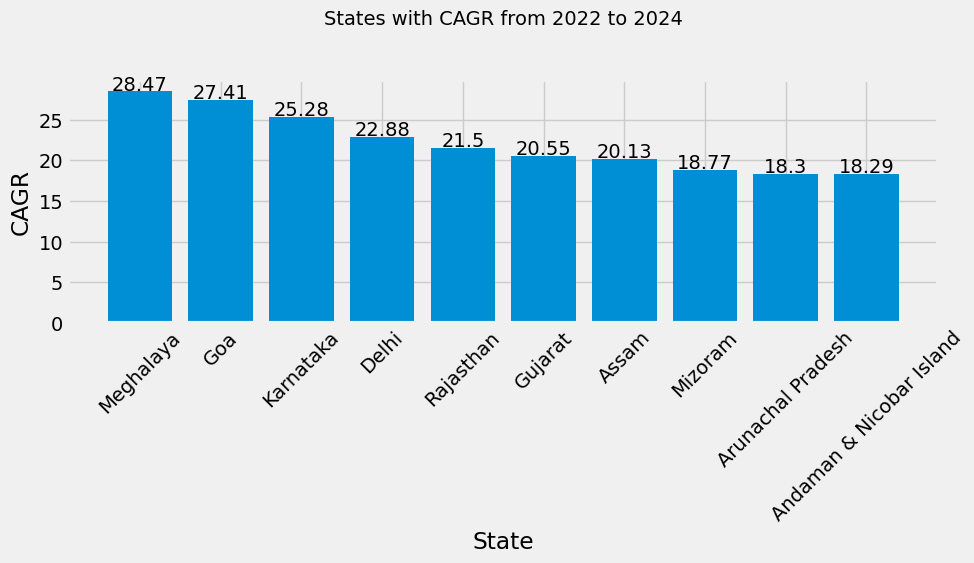

In [49]:
# Plot the graph
plt.figure(figsize=(10,3))
plt.bar(df["state"],df["CAGR"],align="center")
for i,value in enumerate(df["CAGR"]):
    plt.text(i, value+0.2, str(value), ha='center', fontsize=14)
plt.title("States with CAGR from 2022 to 2024", fontsize=14, loc="center",pad=40)
plt.xlabel("State")
plt.xticks(rotation=45)
plt.ylabel("CAGR")
plt.show()

# 8. What are the peak and low season months for EV sales based on the data from 2022 to 2024?

In [50]:
#Find Peak and Low Season months for each fiscal year 
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df["month_name"]=df["date"].dt.month_name()
month_order=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'
]
df['month_name']=pd.Categorical(df['month_name'],categories=month_order, ordered=True)
df =df.groupby(['month_name', 'fiscal_year'],as_index=False)['electric_vehicles_sold'].sum()
df_pivot = df.pivot(index='month_name', columns='fiscal_year', values='electric_vehicles_sold')
df_pivot

fiscal_year,2022,2023,2024
month_name,,,
January,31672,68116,89311
February,38171,70827,89051
March,58118,95126,138343
April,6315,55524,72818
May,1499,45373,112997
June,5487,47591,53631
July,15794,50010,61622
August,17153,55584,69224
September,19351,56828,69793


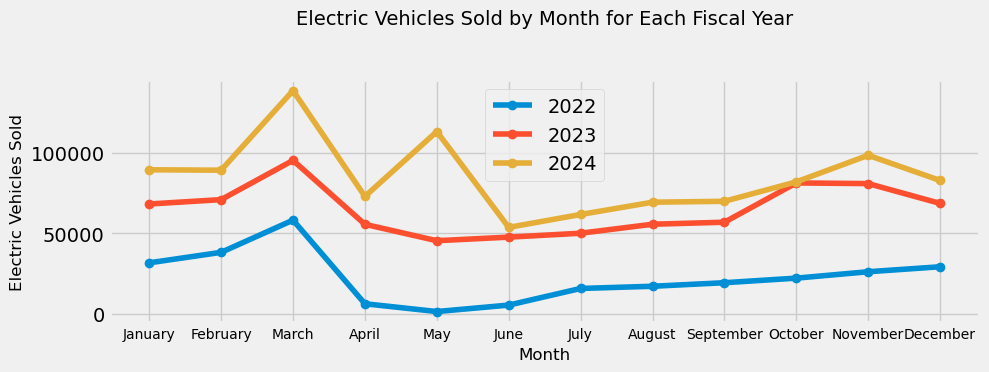

In [51]:
# Plot the Graph
plt.figure(figsize=(10, 3))
df_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.legend(loc="best")
plt.title("Electric Vehicles Sold by Month for Each Fiscal Year",fontsize=14,loc="center",pad=40)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Electric Vehicles Sold",fontsize=12)
plt.xticks(ticks=range(len(month_order)), labels=month_order,fontsize=10)
plt.show()

 March is month having peak sales irrespective of fiscal years. May is month with low sales for fiscal year 2022,2023. June is month with least sales in fiscal year 2024.

# 9. What is the projected number of EV sales (including 2-wheelers and 4-wheelers) for the top 10 states by penetration rate in 2030, based on the compounded annual growth rate (CAGR) from previous years? 

In [52]:
df=pd.merge(left=df_date,right=df_state,on="date",how="inner")

# Find electric vehicles sold by states
ev_sales=df.groupby(["state"],as_index=False)["electric_vehicles_sold"].sum()

# Find total vehicles sold by states
total_sales= df.groupby(["state"],as_index=False)["total_vehicles_sold"].sum()

# Merge above dataframes to get penetration rate for given state
df=pd.merge(left=ev_sales,right=total_sales,on="state",how="inner")
df["penetration_rate"]=round((df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100,2)
df_PR=df[["state","penetration_rate"]]
df_PR

,state,penetration_rate
0,Andaman & Nicobar Island,0.42
1,Andhra Pradesh,3.39
2,Arunachal Pradesh,0.05
3,Assam,0.46
4,Bihar,1.02
5,Chandigarh,4.04
6,Chhattisgarh,4.03
7,DNH and DD,0.82
8,Delhi,6.76
9,Goa,9.84


In [53]:
# Find electric vehicles sales in fiscal year 2024 by states
df_2024=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df_2024=df_2024[df_2024["fiscal_year"]==2024]
df_2024 = df_2024.groupby(["state"], as_index=False)["electric_vehicles_sold"].sum().rename(columns={"electric_vehicles_sold": "electric_vehicles_sold_2024"})
df_2024

,state,electric_vehicles_sold_2024
0,Andaman & Nicobar Island,35
1,Andhra Pradesh,33183
2,Arunachal Pradesh,31
3,Assam,3497
4,Bihar,15069
5,Chandigarh,2877
6,Chhattisgarh,28540
7,DNH and DD,198
8,Delhi,46724
9,Goa,10799


In [54]:
# Find electric vehicles sales in fiscal year 2022 by states
df_2022=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df_2022=df_2022[df_2022["fiscal_year"]==2022]
df_2022 = df_2022.groupby(["state"], as_index=False)["electric_vehicles_sold"].sum().rename(columns={"electric_vehicles_sold": "electric_vehicles_sold_2022"})
df_2022

,state,electric_vehicles_sold_2022
0,Andaman & Nicobar Island,22
1,Andhra Pradesh,13928
2,Arunachal Pradesh,0
3,Assam,730
4,Bihar,4829
5,Chandigarh,411
6,Chhattisgarh,4534
7,DNH and DD,35
8,Delhi,16535
9,Goa,1778


In [55]:
# Merge above 2 dataframes to get CAGR for given state
df_CAGR=pd.merge(left=df_2022,right=df_2024,on="state",how="inner")
df_CAGR["CAGR"]=round((((df_CAGR["electric_vehicles_sold_2024"]/df_CAGR["electric_vehicles_sold_2022"])**(1/2))-1)*100,2)
df_CAGR["CAGR"]=np.where(df_CAGR["electric_vehicles_sold_2022"]==0,0,df_CAGR["CAGR"])
df_CAGR.sort_values(by="CAGR",ascending=False)[["state","CAGR"]]

,state,CAGR
21,Meghalaya,476.63
30,Tripura,229.50
23,Nagaland,200.00
5,Chandigarh,164.58
6,Chhattisgarh,150.89
33,West Bengal,150.62
9,Goa,146.45
7,DNH and DD,137.85
31,Uttar Pradesh,137.70
18,Madhya Pradesh,133.67


In [56]:
# Find electric vehicles sales in fiscal year 2024 by states
df_sales=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df_sales=df_sales[df_sales["fiscal_year"]==2024]
df_sales=df_sales.groupby(["state"],as_index=False)["electric_vehicles_sold"].sum().rename(columns={"electric_vehicles_sold":"electric_vehicles_sold_24"})
df_sales

,state,electric_vehicles_sold_24
0,Andaman & Nicobar Island,35
1,Andhra Pradesh,33183
2,Arunachal Pradesh,31
3,Assam,3497
4,Bihar,15069
5,Chandigarh,2877
6,Chhattisgarh,28540
7,DNH and DD,198
8,Delhi,46724
9,Goa,10799


In [57]:
# Merge df_CAGR,df_PR and df_sales to determine the projected sales in 2030
df=pd.merge(left=df_CAGR,right=df_PR,on="state",how="inner")
df=df[["state","CAGR","penetration_rate"]]
df=pd.merge(df,df_sales,on="state",how="inner")
df.groupby(["state"]).agg({"CAGR":"mean","penetration_rate":"mean","electric_vehicles_sold_24":"mean"}).sort_values(by="penetration_rate",ascending=False).head(10)

,CAGR,penetration_rate,electric_vehicles_sold_24
state,,,
Goa,146.45,9.84,10799.0
Karnataka,93.24,7.84,160989.0
Delhi,68.10,6.76,46724.0
Kerala,131.67,6.60,73204.0
Maharashtra,101.89,6.49,197169.0
Odisha,102.94,4.63,39118.0
Rajasthan,81.87,4.55,66444.0
Gujarat,116.33,4.40,84359.0
Tamil Nadu,59.95,4.30,94314.0


In [58]:
# Find projected sales in 2030 
# Formula to get projected Sales is 
# (Current Year Sales *(1+CAGR/100)**n) where n is number of years projected sales year is ahead of current year
df["projected_sales_2030"] = round((df["electric_vehicles_sold_24"]*(1+df["CAGR"]/100)**6)/1000000,2)
df["projected_sales_2030"]=df["projected_sales_2030"].apply(lambda x: f"{x:.2f} Million")
df.sort_values(by="penetration_rate",ascending=False).head(10)

,state,CAGR,penetration_rate,electric_vehicles_sold_24,projected_sales_2030
9,Goa,146.45,9.84,10799,2.42 Million
15,Karnataka,93.24,7.84,160989,8.38 Million
8,Delhi,68.10,6.76,46724,1.05 Million
16,Kerala,131.67,6.60,73204,11.32 Million
19,Maharashtra,101.89,6.49,197169,13.35 Million
24,Odisha,102.94,4.63,39118,2.73 Million
27,Rajasthan,81.87,4.55,66444,2.40 Million
10,Gujarat,116.33,4.40,84359,8.65 Million
29,Tamil Nadu,59.95,4.30,94314,1.58 Million
5,Chandigarh,164.58,4.04,2877,0.99 Million


**Maharashtra State tend to have maximum sales projected for year 2030 ,but the penetration rate is still less.
Goa State tend to have more penetration rate but the sales projected are not high as of Maharashtra.**

# 10. Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average unit price. 

In [59]:
# For 2 Wheelers 2022 vs 2024
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2022)&(df["vehicle_category"]=="2-Wheelers")]
revenue_22=df["electric_vehicles_sold"].sum()

df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="2-Wheelers")]
revenue_24=df["electric_vehicles_sold"].sum()

revenue_growth_22_24_2_wheelers=round(((revenue_24-revenue_22)/revenue_22)*100,2)
print(f"Revenue growth for 2 Wheelers in 2022 vs 2024 is {revenue_growth_22_24_2_wheelers}%")

Revenue growth for 2 Wheelers in 2022 vs 2024 is 269.28%


In [60]:
# For 2 Wheelers 2023 vs 2024
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2023)&(df["vehicle_category"]=="2-Wheelers")]
revenue_23=df["electric_vehicles_sold"].sum()

df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="2-Wheelers")]
revenue_24=df["electric_vehicles_sold"].sum()

revenue_growth_23_24_2_wheelers=round(((revenue_24-revenue_23)/revenue_23)*100,2)
print(f"Revenue growth for 2 Wheelers in 2023 vs 2024 is {revenue_growth_23_24_2_wheelers}%")

Revenue growth for 2 Wheelers in 2023 vs 2024 is 28.13%


In [61]:
# For 4 Wheelers 2022 vs 2024
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2022)&(df["vehicle_category"]=="4-Wheelers")]
revenue_22=df["electric_vehicles_sold"].sum()

df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="4-Wheelers")]
revenue_24=df["electric_vehicles_sold"].sum()

revenue_growth_22_24_4_wheelers=round(((revenue_24-revenue_22)/revenue_22)*100,2)
print(f"Revenue growth for 4 Wheelers in 2022 vs 2024 is {revenue_growth_22_24_4_wheelers}%")

Revenue growth for 4 Wheelers in 2022 vs 2024 is 367.79%


In [62]:
# For 4 Wheelers 2023 vs 2024
df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2023)&(df["vehicle_category"]=="4-Wheelers")]
revenue_23=df["electric_vehicles_sold"].sum()

df=pd.merge(left=df_date,right=df_makers,on="date",how="inner")
df=df[(df["fiscal_year"]==2024)&(df["vehicle_category"]=="4-Wheelers")]
revenue_24=df["electric_vehicles_sold"].sum()

revenue_growth_23_24_4_wheelers=round(((revenue_24-revenue_23)/revenue_23)*100,2)
print(f"Revenue growth for 2 Wheelers in 2023 vs 2024 is {revenue_growth_23_24_4_wheelers}%")

Revenue growth for 2 Wheelers in 2023 vs 2024 is 83.08%


In [63]:
# Revenue growth data for 2-Wheelers
data1={"vehicle_category":"2-Wheelers",
    "revenue_growth_22_24":pd.Series(revenue_growth_22_24_2_wheelers),
    "revenue_growth_23_24":pd.Series(revenue_growth_23_24_2_wheelers),
   }

# Revenue growth data for 4-Wheelers
data2={"vehicle_category":"4-Wheelers",
    "revenue_growth_22_24":pd.Series(revenue_growth_22_24_4_wheelers),
    "revenue_growth_23_24":pd.Series(revenue_growth_23_24_4_wheelers),
    
}
df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)

# Concatenating above 2 dataframes for comparison
df=pd.concat([df1,df2])
df

,vehicle_category,revenue_growth_22_24,revenue_growth_23_24
0,2-Wheelers,269.28,28.13
0,4-Wheelers,367.79,83.08


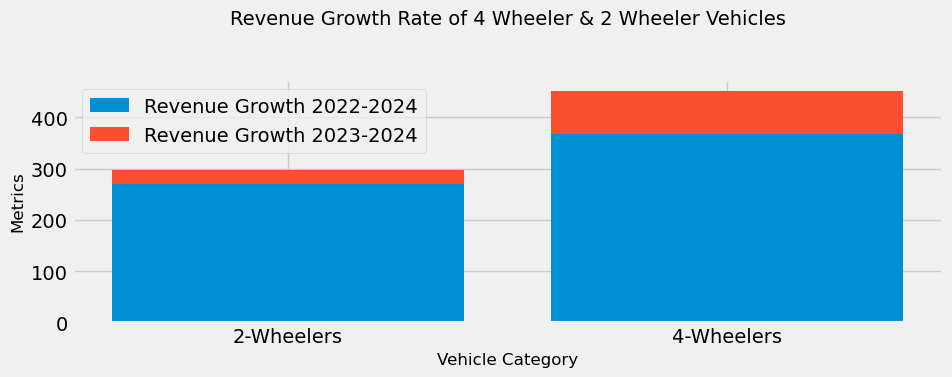

In [64]:
# Plot the graph
plt.figure(figsize=(10, 3))
plt.bar(df["vehicle_category"], df["revenue_growth_22_24"], label="Revenue Growth 2022-2024")
plt.bar(df["vehicle_category"], df["revenue_growth_23_24"], 
         label="Revenue Growth 2023-2024", bottom=df["revenue_growth_22_24"])
plt.title("Revenue Growth Rate of 4 Wheeler & 2 Wheeler Vehicles", fontsize=14,pad=40)
plt.xlabel("Vehicle Category", fontsize=12)
plt.ylabel("Metrics", fontsize=12)
plt.legend(loc="upper left")
plt.show()

4-Wheelers have a higher revenue growth in 2022 compared to 2-Wheelers.
The revenue growth for 4-Wheelers in 2024 is also greater than that of 2-Wheelers.

# Secondary Research Questions

# 1.What are the primary reasons for customers choosing 4-wheeler EVs in 2023 and 2024 (cost savings, environmental concerns, government incentives)?


1. **Cost Savings**: Lower fuel and maintenance costs, with long-term savings despite higher upfront prices.  
2. **Environmental Concerns**: Reduced carbon emissions and support for sustainable transportation.  
3. **Government Incentives**: Tax credits, rebates, reduced road taxes, and access to low-emission zones.

# 2.How do government incentives and subsidies impact the adoption rates of 2-wheelers and 4-wheelers? Which states in India provided most subsidies?

1. **Impact on Adoption Rates**: Government incentives and subsidies lower the upfront cost of EVs, making them more affordable and accelerating the adoption of both 2-wheelers and 4-wheelers. They also promote infrastructure development, boosting consumer confidence.

2. **States with Most Subsidies**: States like **Delhi**, **Maharashtra**, **Gujarat**, and **Tamil Nadu** offer significant subsidies, tax exemptions, and incentives to promote EV adoption in India.

# 3.How does the availability of charging stations infrastructure correlate with the EV sales and penetration rates in the top 5 states?


In [65]:
df_ev_sales=pd.merge(left=df_date,right=df_state,on="date",how="inner")
df_ev_sales=df_ev_sales.groupby(["state"],as_index=False)["electric_vehicles_sold"].sum().sort_values(by="electric_vehicles_sold",ascending=False)

df=pd.merge(left=df_date,right=df_state,on="date",how="inner")
ev_sales=df.groupby(["state"],as_index=False)["electric_vehicles_sold"].sum()
total_sales= df.groupby(["state"],as_index=False)["total_vehicles_sold"].sum()
df=pd.merge(left=ev_sales,right=total_sales,on="state",how="inner")
df["penetration_rate"]=round((df["electric_vehicles_sold"]/df["total_vehicles_sold"])*100,2)
df_PR=df[["state","penetration_rate"]]
df_PR=df_PR.sort_values(by="penetration_rate",ascending=False)

In [66]:
df=pd.merge(left=df_ev_sales,right=df_PR,on="state",how="inner")
df.sort_values(by=["electric_vehicles_sold","penetration_rate"],ascending=[False,False]).head(5)

,state,electric_vehicles_sold,penetration_rate
0,Maharashtra,396045,6.49
1,Karnataka,312995,7.84
2,Tamil Nadu,200062,4.30
3,Gujarat,181389,4.40
4,Rajasthan,150366,4.55


States with better charging infrastructure, like Karnataka, tend to have higher penetration rates, while others with strong sales, such as Maharashtra, need expanded infrastructure to increase penetration.

# 4.Who should be the brand ambassador if AtliQ Motors launches their EV/Hybrid vehicles in India and why?

1. **Mahendra Singh Dhoni**, a renowned automobile enthusiast, brings authenticity to EV promotion with his eco-conscious lifestyle and mass appeal. His passion aligns with AtliQ’s vision of sustainability, making him a trusted voice for change. *"Driven by Excellence, Powered by Change"* perfectly captures this powerful partnership.

2. **John Abhraham**, an avid biker and automobile enthusiast, brings unmatched credibility to AtliQ’s EV offerings with his passion for mobility. His image as a fitness icon and eco-warrior perfectly complements the sleek style and innovative performance of EVs. *"Power Meets Purpose"* encapsulates this dynamic synergy, driving the vision of sustainable mobility forward..

Both ambassadors bring authenticity and passion for automobiles, making them ideal for positioning AtliQ Motors as a game-changer in the EV market.

# 5.Which state of India is ideal to start the manufacturing unit? (Based on subsidies provided, ease of doing business, stability in governance etc.)


# Best State to Start an EV Manufacturing Unit: Gujarat

## Key Advantages of Gujarat:

**Subsidies:** Significant incentives under Industrial and EV Policies.

**Ease of Doing Business:** High ranking in Ease of Doing Business Index, making it easier to set up operations.

**Governance Stability:** Known for stable governance and proactive industrial policies that support business growth.

**Infrastructure:** Well-connected ports (e.g., Mundra), facilitating smooth logistics and international trade.

**Skilled Manpower:** Availability of a skilled workforce essential for EV manufacturing.



# Secondary Option: Maharashtra

## Key Advantages of Maharashtra:

**EV Market & Customer Base:** Largest urban EV market, with significant sales in Mumbai and Pune.

**Subsidies & Incentives:** Attractive incentives under the Maharashtra EV Policy, promoting EV manufacturing and infrastructure.

**EV Penetration:** Leads in EV sales and expected to maintain strong growth through 2030.

**Conclusion:**

**Primary Recommendation:** Gujarat due to its balance of subsidies, ease of doing business, governance stability, and infrastructure.

**Secondary Recommendation:** Maharashtra, ideal for access to a large EV market and further growth
        potential.

# 6.Your top 3 recommendations for AtliQ Motors.

### Here are the top 3 recommendations for AtliQ Motors based on the Indian EV market analysis:

# 1. Focus on Key Growth Regions
**Target Major States:** Focus on Gujarat and Maharashtra, which provide significant subsidies, strong EV focus,
       and favorable business environments.
Leverage Growing Ecosystems: These states have robust infrastructure and an evolving EV ecosystem, making them ideal for AtliQ Motors’ expansion.
# 2. Invest in Local Manufacturing & Infrastructure
**Set Up Manufacturing Units:** Establish manufacturing facilities in states with attractive incentives
      (e.g., Gujarat, Maharashtra) to reduce costs and meet local demand efficiently.
      
**Develop Charging Infrastructure:** Invest in a comprehensive network of EV charging stations and service 
       centers to support adoption, ensuring consumer convenience and market penetration.
# 3. Leverage Strategic Partnerships & Innovation
**Form Alliances:** Partner with local businesses, technology providers, and government bodies to optimize supply chains, navigate regulatory challenges, and leverage regional expertise.

**Invest in Technological Innovation:** Focus on advanced EV features to differentiate AtliQ Motors in the competitive market.

**Expand Charging Networks:** Collaborate to enhance the charging infrastructure, boosting 
       consumer confidence and adoption rates.
       
**These strategies will help AtliQ Motors effectively enter and grow in the Indian EV market.**


<h1 align="center">Thank You ! </h1>